In [238]:
import sys
sys.path.append('../')
import jax.numpy as jnp
import matplotlib.pyplot as plt
import e3nn_jax as e3nn
import chex
from src import spectra
import plotly.graph_objects as go

def colorplot(arr: jnp.ndarray):
    """Helper to plot a 1D array as a color plot."""
    reshaped_arr = arr.reshape(3, 5)  # Reshape the array into 3 rows of 5 components each
    plt.figure(figsize=(15, 3))  # Adjust the figure size to accommodate the reshaped array
    plt.axis("off")
    vmax = jnp.maximum(jnp.abs(jnp.min(reshaped_arr)), jnp.max(reshaped_arr))  # Compute vmax using the reshaped array
    return plt.imshow(reshaped_arr, cmap="PuOr", vmin=-vmax, vmax=vmax)  # Plot the reshaped array

def visualize(geometry):
    """
    """
    sig = spectra.sum_of_diracs(geometry, lmax=4)

    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            yaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            zaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            bgcolor='rgba(255,255,255,255)',
            aspectmode='cube',
            camera=dict(
                eye=dict(x=0.5, y=0.5, z=0.5)
            )
        ),
        plot_bgcolor='rgba(255,255,255,255)',
        paper_bgcolor='rgba(255,255,255,255)',
        margin=dict(l=0, r=0, t=0, b=0),
        showlegend=True
    )

    spherical_harmonics_trace = go.Surface(e3nn.to_s2grid(sig, 100, 99, quadrature="soft").plotly_surface(radius=0.5, scale_radius_by_amplitude=True), name="spherical_harmonics_trace")
    return go.Figure(data=[spherical_harmonics_trace], layout=layout)

In [239]:
def visualize_points(geometry):
    """
    """
    layout = go.Layout(
        scene=dict(
            xaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            yaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            zaxis=dict(title='', showticklabels=False, showgrid=False, zeroline=False, backgroundcolor='rgba(255,255,255,255)', range=[-2.5, 2.5]),
            bgcolor='rgba(255,255,255,255)',
            aspectmode='cube',
            camera=dict(
                eye=dict(x=0.5, y=0.5, z=0.5)
            )
        ),
        plot_bgcolor='rgba(255,255,255,255)',
        paper_bgcolor='rgba(255,255,255,255)',
        margin=dict(l=0, r=0, t=0, b=0),
        showlegend=True
    )

    lines = []
    for point in geometry:
        lines.append(go.Scatter3d(x=[0, point[0]], y=[0, point[1]], z=[0, point[2]], mode='lines', line=dict(color='black', width=10)))

    return go.Figure(data=lines, layout=layout)



In [240]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
%autoreload 2
from src import spectra

In [242]:
bispectrum = spectra.Spectra(neighbors=["S"], cutoff=spectra.radial_cutoff(3))
bispectrum.load_cif('../cif_files/mp/AgS/mp-4762.cif')

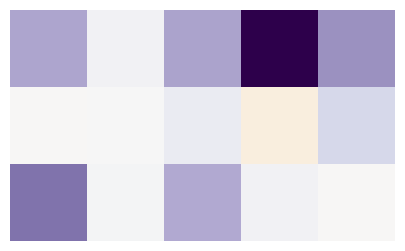

In [243]:
atom_site_index = 7
bispectrum_array = bispectrum.compute_atom_spectra(atom_site_index)
colorplot(bispectrum_array)

In [244]:
local_env = bispectrum.get_atom_local_env(atom_site_index)/2
visualize(local_env)

In [245]:
local_env

Array([[-0.4350779 , -0.55586183,  1.0502949 ],
       [-0.4350779 ,  0.06273329, -1.1887674 ],
       [ 1.3022456 ,  0.06273329,  0.32150698]], dtype=float32)

In [246]:
true_geometry = jnp.asarray([
    [1, 0, 0],
    [-0.5, jnp.sqrt(3)/2, 0],
    [-0.5, -jnp.sqrt(3)/2, 0]])

visualize(true_geometry)

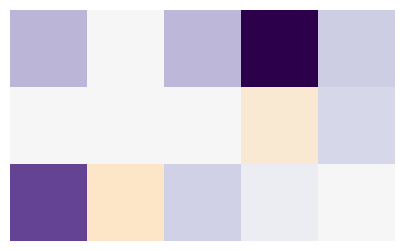

In [247]:
bispectrum_array = bispectrum.compute_geometry_spectra(true_geometry)
colorplot(bispectrum_array)

In [248]:
true_geometry = jnp.asarray([
    [1, 0, 0],
    [-0.5, jnp.sqrt(3)/2, 0],
    [-0.5, -jnp.sqrt(3)/2, 0]])
true_sig = spectra.sum_of_diracs(true_geometry, lmax=4)

bispectrum = spectra.Spectra(lmax=4, order=2)
true_spectrum = bispectrum.compute_geometry_spectra(true_geometry)

predicted_geometry = bispectrum.invert(true_spectrum)

Step 0, Loss: 0.06511082500219345
Step 100, Loss: 0.0017863441025838256
Step 200, Loss: 4.846770389121957e-05
Step 300, Loss: 5.4776781325927004e-05
Step 400, Loss: 0.0003370597551111132
Step 500, Loss: 0.00024452790967188776
Step 600, Loss: 0.00026050052838400006
Step 700, Loss: 6.263957766350359e-05
Step 800, Loss: 2.7913145459024236e-05
Step 900, Loss: 9.542507177684456e-05
Step 1000, Loss: 0.00036793763865716755
Step 1100, Loss: 6.552104605361819e-05
Step 1200, Loss: 2.9417718906188384e-05
Step 1300, Loss: 0.000471376784844324
Step 1400, Loss: 0.0002076950331684202
Step 1500, Loss: 0.0001543845428386703
Step 1600, Loss: 6.465877231676131e-05
Step 1700, Loss: 0.0002876809157896787
Step 1800, Loss: 5.471340045914985e-05
Step 1900, Loss: 6.493986438727006e-05


In [249]:
predicted_geometry[2]

[Array(0.06511083, dtype=float32),
 Array(0.02392395, dtype=float32),
 Array(0.0110015, dtype=float32),
 Array(0.00482097, dtype=float32),
 Array(0.00178634, dtype=float32),
 Array(0.00033192, dtype=float32),
 Array(0.00015315, dtype=float32),
 Array(0.00010426, dtype=float32),
 Array(4.8467704e-05, dtype=float32),
 Array(5.1362174e-05, dtype=float32),
 Array(8.475596e-05, dtype=float32),
 Array(6.2053274e-05, dtype=float32),
 Array(5.477678e-05, dtype=float32),
 Array(1.2874047e-05, dtype=float32),
 Array(0.00011082, dtype=float32),
 Array(7.1808034e-05, dtype=float32),
 Array(0.00033706, dtype=float32),
 Array(0.00038229, dtype=float32),
 Array(0.00028601, dtype=float32),
 Array(4.7891504e-06, dtype=float32),
 Array(0.00024453, dtype=float32),
 Array(0.00025296, dtype=float32),
 Array(4.0268624e-05, dtype=float32),
 Array(4.858087e-05, dtype=float32),
 Array(0.0002605, dtype=float32),
 Array(0.00056818, dtype=float32),
 Array(2.1546919e-05, dtype=float32),
 Array(0.00012821, dtype=fl

In [286]:
step = 79
pred_geo = predicted_geometry[1][step]['predicted_geometry']
visualize(pred_geo)

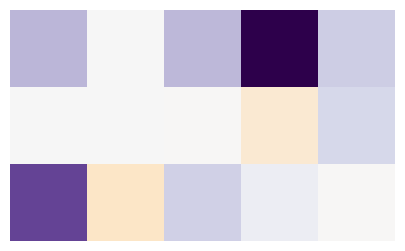

In [289]:
colorplot(bispectrum.compute_geometry_spectra(pred_geo))

In [252]:
visualize_points(local_env)